In [ ]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display as lbd

import os

In [ ]:
!unzip '/content/drive/MyDrive/Datasets/ICBHI_final_database.zip'

Archive:  /content/drive/MyDrive/Datasets/ICBHI_final_database.zip
  inflating: ICBHI_final_database/101_1b1_Al_sc_Meditron.txt  
  inflating: ICBHI_final_database/101_1b1_Al_sc_Meditron.wav  
  inflating: ICBHI_final_database/101_1b1_Pr_sc_Meditron.txt  
  inflating: ICBHI_final_database/101_1b1_Pr_sc_Meditron.wav  
  inflating: ICBHI_final_database/102_1b1_Ar_sc_Meditron.txt  
  inflating: ICBHI_final_database/102_1b1_Ar_sc_Meditron.wav  
  inflating: ICBHI_final_database/103_2b2_Ar_mc_LittC2SE.txt  
  inflating: ICBHI_final_database/103_2b2_Ar_mc_LittC2SE.wav  
  inflating: ICBHI_final_database/104_1b1_Al_sc_Litt3200.txt  
  inflating: ICBHI_final_database/104_1b1_Al_sc_Litt3200.wav  
  inflating: ICBHI_final_database/104_1b1_Ar_sc_Litt3200.txt  
  inflating: ICBHI_final_database/104_1b1_Ar_sc_Litt3200.wav  
  inflating: ICBHI_final_database/104_1b1_Ll_sc_Litt3200.txt  
  inflating: ICBHI_final_database/104_1b1_Ll_sc_Litt3200.wav  
  inflating: ICBHI_final_database/104_1b1_Lr_sc_Lit

In [ ]:
pat_data=pd.read_csv('/content/ICBHI_final_database/patient_diagnosis.csv',names=['pid','disease'])
trydf = pd.read_csv("/content/ICBHI_final_database/101_1b1_Pr_sc_Meditron.txt", sep='\t',names=['start','end','crackles','weezels'])
trydf

,start,end,crackles,weezels
0,0.036,1.264,0,0
1,1.264,3.422,0,0
2,3.422,5.550,0,0
3,5.550,7.436,0,0
4,7.436,9.221,0,0
5,9.221,11.264,0,0
6,11.264,13.264,0,0
7,13.264,15.179,0,0
8,15.179,17.207,0,0
9,17.207,19.179,0,0


In [ ]:
path='/content/ICBHI_final_database/'
files=[s.split('.')[0] for s in os.listdir(path) if '.txt' in s]
files[:5]

['138_1p2_Al_mc_AKGC417L',
 '210_1b1_Al_sc_Meditron',
 '151_3p2_Lr_mc_AKGC417L',
 '131_1b1_Al_sc_Meditron',
 '168_1b1_Al_sc_Meditron']

In [ ]:
files_data=[]
for file in files:
    data=pd.read_csv(path + file + '.txt',sep='\t',names=['start','end','crackles','weezels'])
    name_data= file.split('_')
    data['pid']=name_data[0]
    data['mode']=name_data[-2]
    data['filename']=file
    files_data.append(data)
files_df=pd.concat(files_data)
files_df.reset_index()
files_df.head()

,start,end,crackles,weezels,pid,mode,filename
0,0.159,3.715,0,1,138,mc,138_1p2_Al_mc_AKGC417L
1,3.715,7.855,1,0,138,mc,138_1p2_Al_mc_AKGC417L
2,7.855,11.461,1,0,138,mc,138_1p2_Al_mc_AKGC417L
3,11.461,15.568,1,0,138,mc,138_1p2_Al_mc_AKGC417L
4,15.568,19.157,1,0,138,mc,138_1p2_Al_mc_AKGC417L


In [ ]:
pat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pid      126 non-null    int64 
 1   disease  126 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [ ]:
files_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6898 entries, 0 to 4
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   start     6898 non-null   float64
 1   end       6898 non-null   float64
 2   crackles  6898 non-null   int64  
 3   weezels   6898 non-null   int64  
 4   pid       6898 non-null   object 
 5   mode      6898 non-null   object 
 6   filename  6898 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 431.1+ KB


In [ ]:
pat_data.pid = pat_data.pid.astype('int32')
files_df.pid = files_df.pid.astype('int32')

In [ ]:
data=pd.merge(files_df,pat_data,on='pid')
data.head()

,start,end,crackles,weezels,pid,mode,filename,disease
0,0.159,3.715,0,1,138,mc,138_1p2_Al_mc_AKGC417L,COPD
1,3.715,7.855,1,0,138,mc,138_1p2_Al_mc_AKGC417L,COPD
2,7.855,11.461,1,0,138,mc,138_1p2_Al_mc_AKGC417L,COPD
3,11.461,15.568,1,0,138,mc,138_1p2_Al_mc_AKGC417L,COPD
4,15.568,19.157,1,0,138,mc,138_1p2_Al_mc_AKGC417L,COPD


In [ ]:
data['disease'] = data['disease'].apply(lambda x: 1 if x == 'Healthy' else 0)

In [ ]:
data.disease.unique()
#0-unhealthy
#1-healthy

array([0, 1])

In [ ]:
os.makedirs('processed_audio_files')

In [ ]:
for index,row in data.iterrows():
    print("Index ->",index)
    print("Data->\n",row)
    break

Index -> 0
Data->
 start                        0.159
end                          3.715
crackles                         0
weezels                          1
pid                            138
mode                            mc
filename    138_1p2_Al_mc_AKGC417L
disease                          0
Name: 0, dtype: object


In [ ]:
import librosa as lb
import soundfile as sf
i,c=0,0
rec = []
for index,row in data.iterrows():
    maxLen=8
    start=row['start']
    end=row['end']
    filename=row['filename']
    
    #If len > maxLen , change it to maxLen
    if end-start>maxLen:
        end=start+maxLen
    
    audio_file_loc=path + filename + '.wav'
    
    if index > 0:
        #check if more cycles exits for same patient if so then add i to change filename
        if data.iloc[index-1]['filename']==filename:
            i+=1
        else:
            i=0
    filename= filename + '_' + str(i) + '.wav'
    rec.append(filename)
    save_path='processed_audio_files/' + filename
    c+=1
    
    sampleRate = 22050
    audioArr,sampleRate=lb.load(audio_file_loc)

    max_ind = len(audioArr) 
    start_ind = min(int(start * sampleRate), max_ind)
    end_ind = min(int(end * sampleRate), max_ind)
    pureSample = audioArr[start_ind: end_ind]
    
    #pad audio if pureSample len < max_len
    reqLen=8*sampleRate
    padded_data = lb.util.pad_center(pureSample, reqLen)
    
    sf.write(file=save_path,data=padded_data,samplerate=sampleRate)
print('Total Files Processed: ',c)

Total Files Processed:  6898


In [ ]:
data.filename = rec

In [ ]:
from google.colab import files
files.download('/content/processed_audio_files') 

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xval,ytrain,yval=train_test_split(data,data.disease,stratify=data.disease,random_state=42,test_size=0.25)

In [ ]:
data

,start,end,crackles,weezels,pid,mode,filename,disease
0,0.159,3.715,0,1,138,mc,138_1p2_Al_mc_AKGC417L_0.wav,0
1,3.715,7.855,1,0,138,mc,138_1p2_Al_mc_AKGC417L_1.wav,0
2,7.855,11.461,1,0,138,mc,138_1p2_Al_mc_AKGC417L_2.wav,0
3,11.461,15.568,1,0,138,mc,138_1p2_Al_mc_AKGC417L_3.wav,0
4,15.568,19.157,1,0,138,mc,138_1p2_Al_mc_AKGC417L_4.wav,0
...,...,...,...,...,...,...,...,...
6893,0.022,3.150,1,0,128,mc,128_1b3_Tc_mc_LittC2SE_0.wav,0
6894,3.150,8.107,0,0,128,mc,128_1b3_Tc_mc_LittC2SE_1.wav,0
6895,8.107,13.664,1,0,128,mc,128_1b3_Tc_mc_LittC2SE_2.wav,0
6896,13.664,19.350,1,0,128,mc,128_1b3_Tc_mc_LittC2SE_3.wav,0


In [ ]:
root='/content/processed_audio_files/'
mfcc = []

for idx,row in Xval.iterrows():
    path=root + row['filename']
    soundArr,sample_rate=lb.load(path)
    a = lb.feature.mfcc(y=soundArr,sr=sample_rate)
    mfcc.append(a)
    
mfcc_val=np.array(mfcc)

mfcc = []

for idx,row in Xtrain.iterrows():
    path=root + row['filename']
    soundArr,sample_rate=lb.load(path)
    a = lb.feature.mfcc(y=soundArr,sr=sample_rate)
    mfcc.append(a)
    
mfcc_train=np.array(mfcc)

In [ ]:
mfcc_train.shape
#mfcc_train

(5173, 20, 345)

In [ ]:
mfcc_val.shape

(1725, 20, 345)

In [ ]:
mfcc_train

array([[[-566.19635, -566.19635, -566.19635, ..., -566.19635,
         -566.19635, -566.19635],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        ...,
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ]],

       [[-437.69992, -437.69992, -437.69992, ..., -437.69992,
         -437.69992, -437.69992],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        ...,
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   

In [ ]:
input=keras.layers.Input(shape=(20,345,1))
x=keras.layers.Conv2D(32,5,strides=(1,3),padding='same')(input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(96,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.GlobalMaxPooling2D()(x)

x=keras.layers.Dropout(0.2)(x)
x=keras.layers.Dense(50,activation='relu')(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.Dense(25,activation='relu')(x)
x=keras.layers.Dropout(0.3)(x)
output=keras.layers.Dense(1,activation='sigmoid')(x)

model=keras.Model(input, output, name="Model")

In [ ]:
model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20, 345, 1)]      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 115, 32)       832       
                                                                 
 batch_normalization (BatchN  (None, 20, 115, 32)      128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 20, 115, 32)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 57, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 29, 64)        18496 

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=3, min_lr=0.00001,mode='min')
]

In [ ]:
history=model.fit(
    mfcc_train,
    ytrain,
    validation_data = (mfcc_val,yval),
    epochs=100,verbose=1,
    callbacks=my_callbacks
)

Epoch 1/100
162/162 [==============================] - 23s 145ms/step - loss: 0.1298 - accuracy: 0.9532 - val_loss: 0.1309 - val_accuracy: 0.9530 - lr: 0.0010
Epoch 2/100
162/162 [==============================] - 26s 160ms/step - loss: 0.1178 - accuracy: 0.9534 - val_loss: 0.1179 - val_accuracy: 0.9530 - lr: 0.0010
Epoch 3/100
162/162 [==============================] - 27s 170ms/step - loss: 0.1153 - accuracy: 0.9532 - val_loss: 0.1119 - val_accuracy: 0.9530 - lr: 0.0010
Epoch 4/100
162/162 [==============================] - 23s 142ms/step - loss: 0.1058 - accuracy: 0.9534 - val_loss: 0.1190 - val_accuracy: 0.9530 - lr: 0.0010
Epoch 5/100
162/162 [==============================] - 23s 142ms/step - loss: 0.0985 - accuracy: 0.9546 - val_loss: 0.1396 - val_accuracy: 0.9409 - lr: 0.0010
Epoch 6/100
162/162 [==============================] - 23s 140ms/step - loss: 0.1045 - accuracy: 0.9552 - val_loss: 0.0962 - val_accuracy: 0.9612 - lr: 0.0010
Epoch 7/100
162/162 [=========================

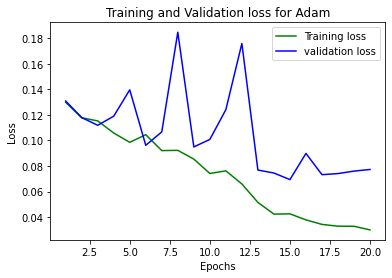

In [ ]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss for Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

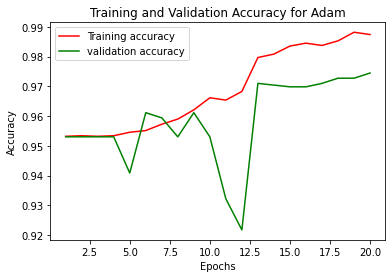

In [ ]:
import matplotlib.pyplot as plt
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, acc_train, 'r', label='Training accuracy')
plt.plot(epochs, acc_val, 'g', label='validation accuracy')
plt.title('Training and Validation Accuracy for Adam')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.evaluate(mfcc_val,yval)

54/54 [==============================] - 2s 36ms/step - loss: 0.0773 - accuracy: 0.9745


[0.07731764018535614, 0.9744927287101746]

In [ ]:
ypred = model.predict(mfcc_val)

In [ ]:
yp = []
for i in ypred:
  if i<0.5:
    yp.append(0)
  else:
    yp.append(1)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yval, yp
                            #, labels=['Unhealthy','Healthy']
                            ))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1644
           1       0.75      0.68      0.71        81

    accuracy                           0.97      1725
   macro avg       0.87      0.83      0.85      1725
weighted avg       0.97      0.97      0.97      1725



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yval,yp)
print(cm)

[[1626   18]
 [  26   55]]


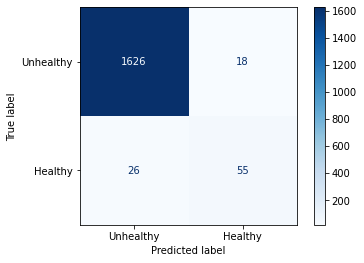

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

labels = ["Unhealthy", "Healthy"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()